# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# Dataset 1

In [ ]:
#Reading the dataset

df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/Thecleverprogrammer.csv')
print(df.head())

         Date  Views
0  01/06/2021   7831
1  02/06/2021   7798
2  03/06/2021   7401
3  04/06/2021   7054
4  05/06/2021   7973


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    391 non-null    object
 1   Views   391 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.2+ KB


In [ ]:
#Convert the date column into datetime data type
df["Date"] = pd.to_datetime(df["Date"],format="%d/%m/%Y")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB
None


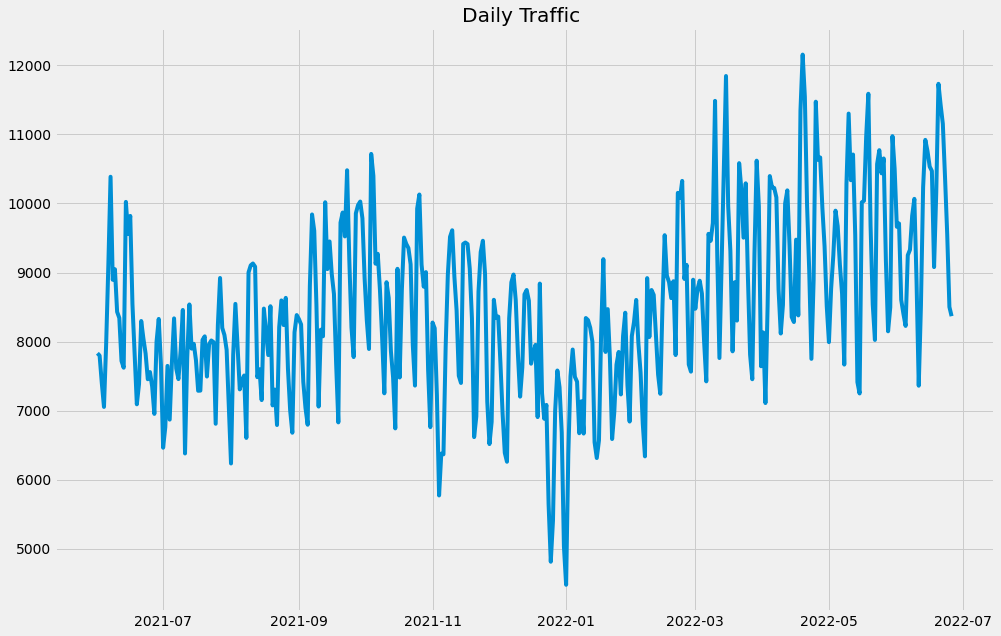

In [ ]:
#Plotting the daily traffic
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
plt.plot(df["Date"], df["Views"])
plt.title("Daily Traffic ")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

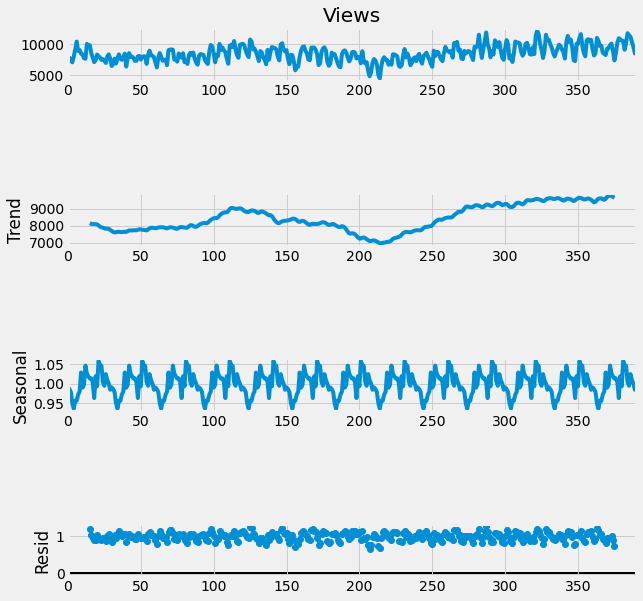

In [ ]:
#Find whether the data is stationary or seasonal

result = seasonal_decompose(df["Views"],model='multiplicative',freq=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(10,10)

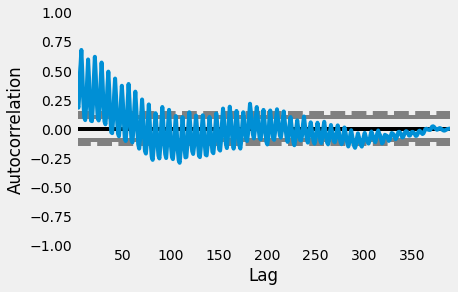

In [ ]:
#Using the seasonal ARIMA to forecase traffic

#d = 1 since the data is not stationary
#p = 5
#q = 2

pd.plotting.autocorrelation_plot(df["Views"])

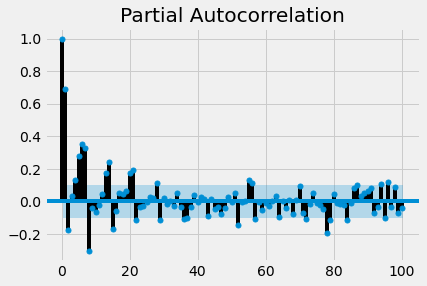

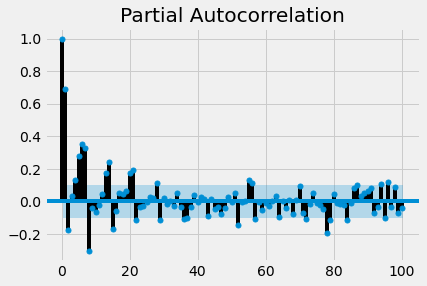

In [ ]:
plot_pacf(df['Views'],lags=100)

In [ ]:
#Train the SARIMA model

p,d,q = 5,1,2
model = sm.tsa.statespace.SARIMAX(df.Views,order=(p,d,q),seasonal_order=(p,d,q,12))
model = model.fit()
print(model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.396
Date:                            Fri, 19 Aug 2022   AIC                           6228.791
Time:                                    16:42:37   BIC                           6287.815
Sample:                                         0   HQIC                          6252.217
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7852      0.132      5.932      0.000       0.526       1.045
ar.L2         -0.7880      0.135   

In [ ]:
predictions = model.predict(len(df),len(df)+50)
print(predictions)

391     9860.127528
392    10775.106240
393    10764.201016
394     9862.038057
395     8753.270861
396     8211.402010
397     8919.689638
398     9680.691155
399    10253.265797
400    10632.036224
401     9857.115724
402     9354.548619
403     9028.186539
404     9066.153982
405    10537.869466
406    10998.439826
407    10899.217638
408    10096.329237
409     9449.172761
410     8618.418506
411     9167.413250
412    10387.108414
413    10585.055261
414    10776.147133
415    10251.908249
416     9447.652924
417     9024.224618
418     9137.424848
419     9859.332931
420    10205.620876
421    10707.478336
422     9899.835319
423     9535.775904
424     9046.887793
425     8790.239221
426    10104.619884
427    10819.088783
428    10899.990843
429    10415.935153
430     9445.427133
431     8674.263360
432     8698.195510
433    10033.399333
434    10488.043392
435    10830.664563
436    10491.143865
437     9334.585436
438     9150.552190
439     9320.132447
440    10266.551631


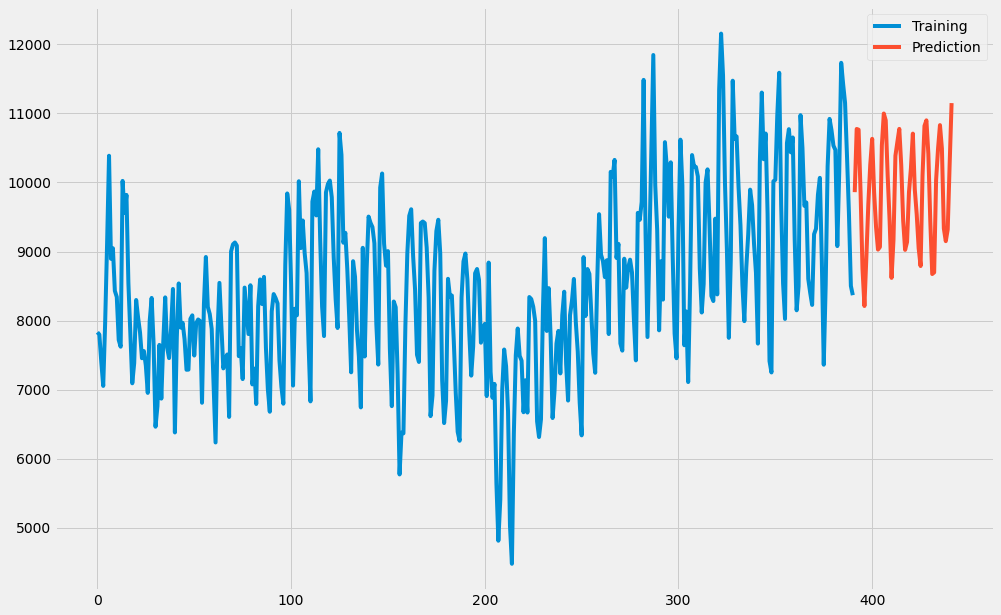

In [ ]:
df["Views"].plot(legend=True, label="Training", figsize=(15,10))
predictions.plot(legend=True, label="Prediction")

# Dataset 2

In [ ]:
data = pd.read_csv('https://github.com/prathyuma-08/OnboardingAppUI/files/9331501/website-traffic.csv')
print(data.head())

   DayOfWeek MonthDay  Year  Visits
0     Monday   June 1  2009      27
1    Tuesday   June 2  2009      31
2  Wednesday   June 3  2009      38
3   Thursday   June 4  2009      38
4     Friday   June 5  2009      31


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   DayOfWeek  214 non-null    object
 1   MonthDay   214 non-null    object
 2   Year       214 non-null    int64 
 3   Visits     214 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 6.8+ KB
None


In [ ]:
data[['x','Month','Day']] = data['MonthDay'].str.split(' ',expand=True)
data

,DayOfWeek,MonthDay,Year,Visits,x,Month,Day
0,Monday,June 1,2009,27,,June,1
1,Tuesday,June 2,2009,31,,June,2
2,Wednesday,June 3,2009,38,,June,3
3,Thursday,June 4,2009,38,,June,4
4,Friday,June 5,2009,31,,June,5
...,...,...,...,...,...,...,...
209,Sunday,December 27,2009,15,,December,27
210,Monday,December 28,2009,24,,December,28
211,Tuesday,December 29,2009,18,,December,29
212,Wednesday,December 30,2009,10,,December,30


In [ ]:
data = data.drop(['DayOfWeek','MonthDay','x'],axis=1)

In [ ]:
def tonum(s):
    switcher = {
        "June": 6,
        "July": 7,
        "August": 8,
        "September": 9,
        "October": 10,
        "November": 11,
        "December": 12
    }
    return switcher.get(s, "invalid")

In [ ]:
data['Month'] = data['Month'].apply(lambda x: tonum(x))

In [ ]:
data['Date'] = data['Day'].astype(str) + "/" + data["Month"].astype(str) + "/" + data["Year"].astype(str)

In [ ]:
data["Date"] = pd.to_datetime(data["Date"],format="%d/%m/%Y")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Year    214 non-null    int64         
 1   Visits  214 non-null    int64         
 2   Month   214 non-null    int64         
 3   Day     214 non-null    object        
 4   Date    214 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 8.5+ KB
None


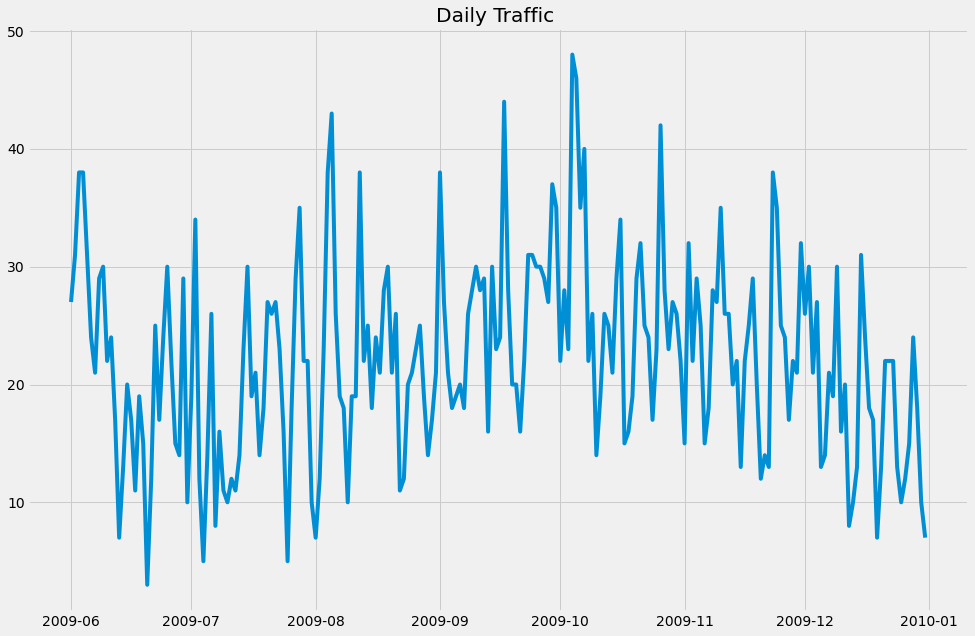

In [ ]:
#Plotting the daily traffic
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
plt.plot(data["Date"], data["Visits"])
plt.title("Daily Traffic ")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

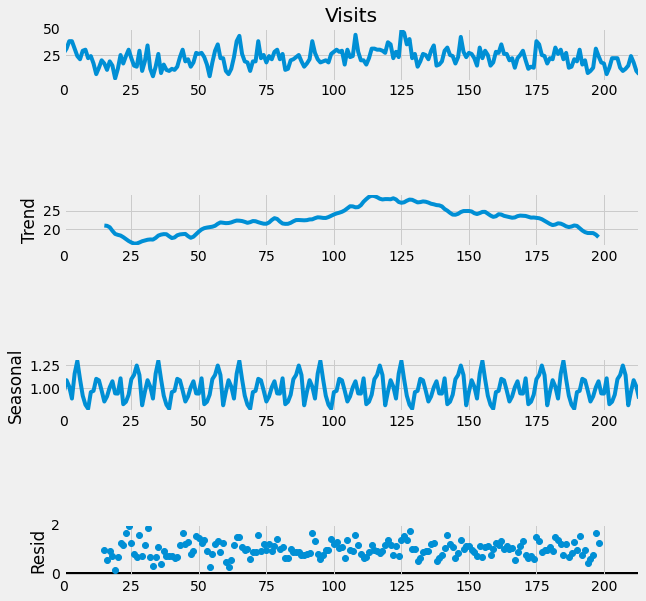

In [ ]:
#Find whether the data is stationary or seasonal

result = seasonal_decompose(data["Visits"],model='multiplicative',freq=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(10,10)

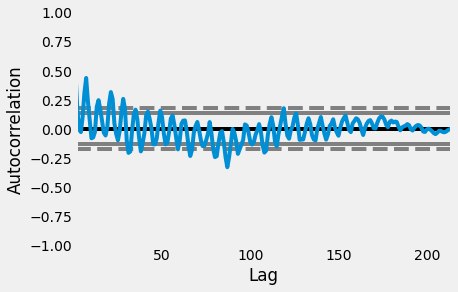

In [ ]:
pd.plotting.autocorrelation_plot(data["Visits"])

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


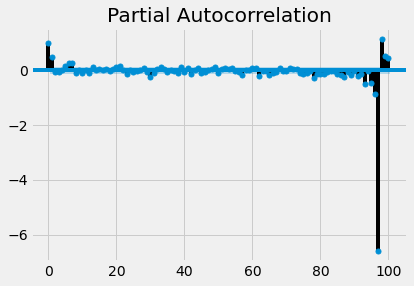

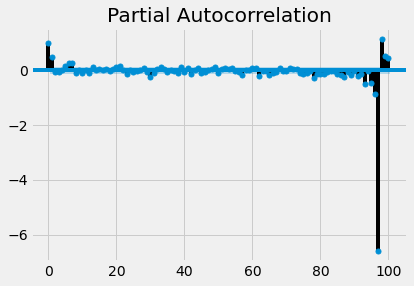

In [ ]:
plot_pacf(data['Visits'],lags=100)

In [ ]:
#Train the SARIMA model

#p,d,q = 5,1,2
model = sm.tsa.statespace.SARIMAX(df.Views,order=(p,d,q),seasonal_order=(p,d,q,12))
model = model.fit()
print(model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
